# Clustering Crypto

In [298]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [299]:
# Load the crypto_data.csv dataset.
#file_path = "crypto_data.csv"
crypto_df = pd.read_csv("crypto_data.csv", index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [300]:
# Keep all the cryptocurrencies that are being traded.
new_crypto_df = crypto_df[crypto_df['IsTrading'] == True]
new_crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [301]:
# Remove the "IsTrading" column. 
new_crypto_df = new_crypto_df.drop(['IsTrading'], axis=1)
new_crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [302]:
# Remove rows that have at least 1 null value.
for column in new_crypto_df.columns:
    print(f"Column {column} has {new_crypto_df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [303]:
# Drop null rows
new_crypto_df = new_crypto_df.dropna()

In [304]:
# Keep the rows where coins are mined.
crypto_df = new_crypto_df[new_crypto_df['TotalCoinsMined'] > 0]
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [305]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names_df = crypto_df.filter(['CoinName'], axis=1)
crypto_names_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [306]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(['CoinName'], axis=1)
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [307]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
# Standardize the data with StandardScaler().
crypto_scaled = StandardScaler().fit_transform(X)
print(crypto_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [309]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

pcs_df = pca.fit_transform(crypto_scaled)

In [310]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    data=pcs_df, columns=["PC 1", "PC 2", "PC 3"], index=X.index 
)
pcs_df.head(10)

,PC 1,PC 2,PC 3
42,-0.331912,0.969977,-0.554593
404,-0.315245,0.970073,-0.555124
1337,2.278773,1.614457,-0.603372
BTC,-0.149927,-1.282056,0.225320
ETH,-0.147777,-1.990730,0.453701
LTC,-0.150146,-1.157782,-0.040632
DASH,-0.426261,1.222890,-0.445987
XMR,-0.161565,-2.225377,0.438012
ETC,-0.146218,-1.990839,0.453671
ZEC,-0.131441,-1.985531,0.470885


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\Stacey\anaconda3.1\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



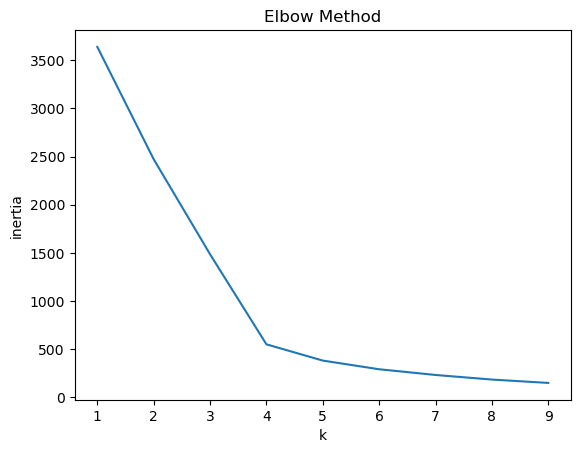

In [311]:
# Create an elbow curve to find the best value for K.
from matplotlib import pyplot as plt
inertia = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(pcs_df)
    inertia[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()

Running K-Means with `k=4`

In [312]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0,

In [313]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pcs_df], axis=1, join="inner")

#clustered.head()

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = crypto_names_df

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.331912,0.969977,-0.554593,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.315245,0.970073,-0.555124,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.278773,1.614457,-0.603372,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.149927,-1.282056,0.225320,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.147777,-1.990730,0.453701,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.150146,-1.157782,-0.040632,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.426261,1.222890,-0.445987,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.161565,-2.225377,0.438012,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.146218,-1.990839,0.453671,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.131441,-1.985531,0.470885,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [314]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    hover_name="CoinName", 
    hover_data=["Algorithm"],
    width=800
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [315]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [316]:
# Print the total number of tradable cryptocurrencies.
print(f"There are {len(clustered_df)} tradable cryptocurrencies.")

There are 532 tradable cryptocurrencies.


In [318]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
clustered_df_scaled = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']])
clustered_df_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [320]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(
    data=clustered_df_scaled, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index 
)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df["CoinName"] = clustered_df["CoinName"]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class"] = clustered_df["Class"]

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,3
ETH,0.000000e+00,0.000109,Ethereum,3
LTC,8.400000e-05,0.000064,Litecoin,3
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,3
ETC,2.100000e-04,0.000115,Ethereum Classic,3
ZEC,2.100000e-05,0.000007,ZCash,3


In [327]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
display(plot_df.hvplot.scatter(
    x="TotalCoinsMined", 
    y="TotalCoinSupply", 
    by="Class",
    hover_cols="CoinName"))


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)